In [2]:
import pandas as pd
import re
import networkx as nx
import statistics
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [145]:
G = nx.read_gexf('Tor2.gexf')
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 197
Number of edges: 221
Average in degree:   1.1218
Average out degree:   1.1218


In [146]:
#load types
import csv
reader = csv.reader(open('types.csv', 'r'))
types = {}
for row in reader:
   k, v = row
   types[k] = v

In [149]:
G.nodes['http://jh32yv5zgayyyts3.onion/']

{'label': 'http://jh32yv5zgayyyts3.onion/', 'type': 'onion list'}

In [148]:
nx.set_node_attributes(G, types, "type")

In [150]:
nx.write_gexf(G, "Tor3.gexf")

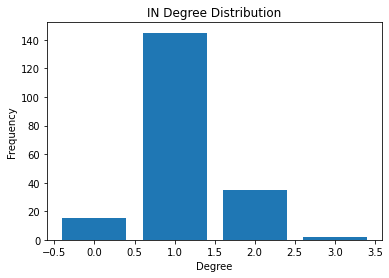

In [118]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from collections import Counter

degree_sequence = [G.in_degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
plt.bar(degree_counts.keys(),degree_counts.values())
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('IN Degree Distribution')
plt.show()

In [119]:
degree_counts 

Counter({2: 35, 1: 145, 0: 15, 3: 2})

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


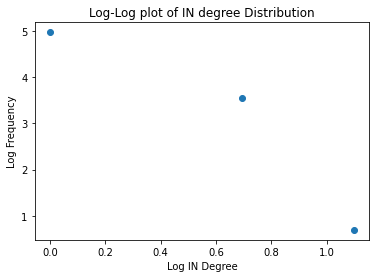

In [120]:
# let's plot log-log 
import numpy as np
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
log_x = np.log(plot_x)
log_y = np.log(plot_y)
plt.xlabel('Log IN Degree')
plt.ylabel('Log Frequency')
plt.title('Log-Log plot of IN degree Distribution')
plt.scatter(log_x, log_y)
plt.show()

In [121]:
def node_max_in_degree(G):
    nodes = dict(G.in_degree(G.nodes()))
    itemMaxValue = max(degree_counts.keys())
    listOfNodes = list()
    # Iterate over all the items in dictionary to find all keys with max value
    for key, value in nodes.items():
        if value == itemMaxValue:
            listOfNodes.append(key)
    return listOfNodes

print(f'Maximum IN degree in this network: {max(degree_counts.keys())}, for node(s): {node_max_in_degree(G)}')
print('Mean IN degree:', statistics.mean(degree_sequence))

Maximum IN degree in this network: 3, for node(s): ['http://easycoinsayj7p5l.onion/', 'http://45tbhx5prlejzjgn36nqaxqb6qnm73pbohuvqkpxz2zowh57bxqawkid.onion/']
Mean IN degree: 1.1218274111675126


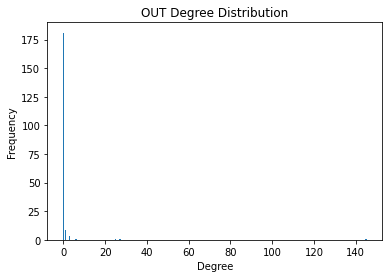

In [122]:
degree_sequence = [G.out_degree(n) for n in G.nodes]
from collections import Counter
degree_counts = Counter(degree_sequence)
plt.bar(degree_counts.keys(),degree_counts.values())
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('OUT Degree Distribution')
plt.show()

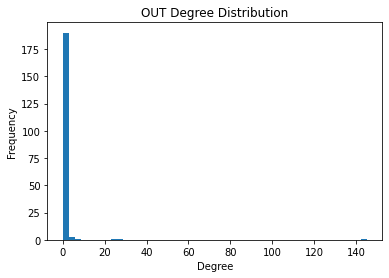

In [123]:
counts, bins, patches = plt.hist(degree_sequence, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('OUT Degree Distribution')
plt.show()

In [124]:
degree_counts 

Counter({0: 181, 1: 9, 3: 3, 27: 1, 145: 1, 6: 1, 25: 1})

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


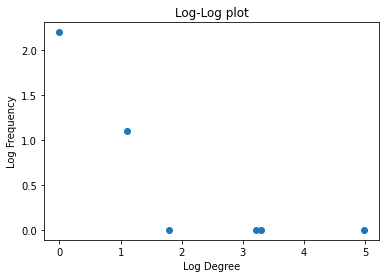

In [79]:
# let's plot log-log 
import numpy as np
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
log_x = np.log(plot_x)
log_y = np.log(plot_y)
plt.xlabel('Log Degree')
plt.ylabel('Log Frequency')
plt.title('Log-Log plot')
plt.scatter(log_x, log_y)
plt.show()

In [80]:
def node_max_out_degree(G):
    nodes = dict(G.out_degree(G.nodes()))
    itemMaxValue = max(degree_counts.keys())
    listOfNodes = list()
    # Iterate over all the items in dictionary to find all keys with max value
    for key, value in nodes.items():
        if value == itemMaxValue:
            listOfNodes.append(key)
    return listOfNodes

print(f'Maximum IN degree in this network: {max(degree_counts.keys())}, for node(s): {node_max_out_degree(G)}')
print('Mean OUT degree:', statistics.mean(degree_sequence))

Maximum IN degree in this network: 145, for node(s): ['http://jh32yv5zgayyyts3.onion/']
Mean OUT degree: 1.1218274111675126


In [81]:
# based on degree (Pearson correlation between degree of adjacent nodes)
r = nx.degree_assortativity_coefficient(G)
print(f'Since Pearson correlation is {r} < 0 thus network is disassortative')

Since Pearson correlation is -0.43755291840253724 < 0 thus network is disassortative


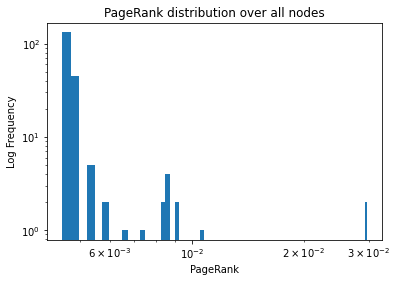

In [110]:
# PageRank distribution over all nodes
page_rank_dict = nx.pagerank(G)
counts, bins, patches = plt.hist(page_rank_dict.values(), bins=100, log=True)
plt.xscale('log')
plt.xlabel('PageRank')
plt.ylabel('Log Frequency')
plt.title('PageRank distribution over all nodes')
plt.show()

In [126]:
# Select all nodes with in-degree 3 and compute their PageRank distribution.
page_rank_dict = nx.pagerank(G)

def PageRank_dist(page_rank_dict,in_degree):
    #computes dict with {node: PageRank} for all nodes with in-degree = degree
    pg= {}
    in_degree_dict = dict(G.in_degree())
    for key in in_degree_dict:
        if in_degree_dict[key] ==degree :
            pg[key] = page_rank_dict[key]
    return pg
        

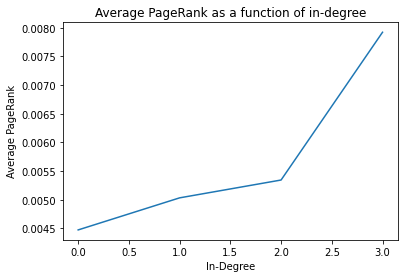

In [127]:
import statistics
# 3. Plot the average PageRank as a function of in-degree. 
in_degree_dict = dict(G.in_degree())
in_degree_list = list(set(in_degree_dict.values()))
avg_page_rank_list = []
for degree in in_degree_list:
    avg_page_rank_list.append(statistics.mean(PageRank_dist(page_rank_dict,degree).values()))


plt.xlabel('In-Degree')
plt.ylabel('Average PageRank')
plt.title('Average PageRank as a function of in-degree')
plt.plot(in_degree_list, avg_page_rank_list)
plt.show()

In [130]:
page_rank_dict = nx.pagerank(G)
in_degree_dict = dict(G.in_degree())

import scipy.stats
in_degree, page_rank = list(in_degree_dict.values()), list(page_rank_dict.values())
r, p_value = scipy.stats.pearsonr(in_degree, page_rank)
print(f'Pearson correlation between the in-degree and the PageRank is {r}')

Pearson correlation between the in-degree and the PageRank is 0.10774324105035418


In [92]:
# What is the average clustering coefficient?
print(f'The average clustering coefficient {nx.average_clustering(G)}')

The average clustering coefficient 0.08415617279319945


In [95]:
D = G.copy()
D = D.to_undirected()

In [97]:
# 3. Is the network connected? If not, how many nodes are in the giant component?
print(f'Is the network connected? {nx.is_connected(D)}')
if nx.is_connected(D) == False:
    print(f'{len(max(nx.connected_components(D), key=len))} nodes are in the giant component')

Is the network connected? False
148 nodes are in the giant component


In [98]:
# What is the network diameter?
D_giant = D.subgraph(max(nx.connected_components(D), key=len))
print(f'The network diameter can be computed only by using giant component. The giant component of a network diameter is {nx.diameter(D_giant)}')

The network diameter can be computed only by using giant component. The giant component of a network diameter is 4


In [100]:
nx.average_shortest_path_length(D_giant)

2.010479867622725

In [111]:
def heterogenity(G):
    # heterogeneity parameter 𝜿 = <k^2>/<k>^2
    k = sum([(G.degree(node)) for node in G.nodes()])/G.number_of_nodes()
    k_2 = sum([(G.degree(node))**2 for node in G.nodes()])/G.number_of_nodes()
    return k_2/(k**2)
print(f'heterogeneity parameter of the network: {heterogenity(G)}')

heterogeneity parameter of the network: 23.152269609549357


In [112]:
# heterogeneity parameter 𝜿
# 𝜿 = <k^2>/<k>^2
k = sum([(G.in_degree(node)) for node in G.nodes()])/G.number_of_nodes()
k_2 = sum([(G.in_degree(node))**2 for node in G.nodes()])/G.number_of_nodes()
K_in_degree = k_2/(k**2)

k = sum([(G.out_degree(node)) for node in G.nodes()])/G.number_of_nodes()
k_2 = sum([(G.out_degree(node))**2 for node in G.nodes()])/G.number_of_nodes()
K_out_degree = k_2/(k**2)
print(f'Since heterogeneity parameter for the in-degree is {K_in_degree} and for the out-degree is {K_out_degree} it is clear that out-degree distribution is more heterogeneous')

Since heterogeneity parameter for the in-degree is 1.2221494236399748 and for the out-degree is 90.55602874634017 it is clear that out-degree distribution is more heterogeneous


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['market (illegal)', 'hacking', 'onion list', 'market (illegal)', 'market (illegal)', 'market', 'market', 'market (illegal)', 'market', 'market (illegal/dark) ', 'market (illegal)', 'Anti-Semitisim', 'hacking', 'Bitcoin wallet', 'hacking', 'market', 'market (illegal)', 'document transfer/secret chats', 'Anti-Semitisim', 'document transfer/secret chats', 'Bitcoin wallet', 'hacking', 'market (illegal)', 'market', 'Anti-Semitisim', 'market (illegal)', 'market (illegal)', 'market (illegal)', 'market', 'market (illegal)', 'market (illegal)', 'market', 'market (illegal)', 'hacking', 'steam tunnels', 'onion list', 'market (illegal)', 'market', 'market (illegal)', 'Anti-Semitisim', 'market', 'onion list', 'hacking', 'steam tunnels', 'onion list', 'Bitcoin wallet', 'document transfer/secret chats', 'market (illegal)', 'market (illegal)', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market (illegal)', 'market (illegal)', 'market', 'market', 'market (illegal)', 'market (illegal)', 'market', 'market', 'market', 'market', 'market', 'market (illegal)', 'market (illegal)', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'market', 'Anti-Semitisim', 'hacking', 'onion list', 'market (illegal)', 'journalism', 'hacking', 'politics', 'market (illegal)', 'hacking', 'onion list', 'info', 'info', 'market (illegal)', 'hacking', 'market (illegal)', 'onion list', 'market (illegal)', 'market (illegal)', 'market', 'info', 'document transfer/secret chats', 'document transfer/secret chats', 'info', 'document transfer/secret chats', 'market (illegal)', 'Anti-Semitisim', 'document transfer/secret chats', 'market (illegal)', 'document transfer/secret chats', 'market (illegal)', 'document transfer/secret chats', 'document transfer/secret chats', 'info']

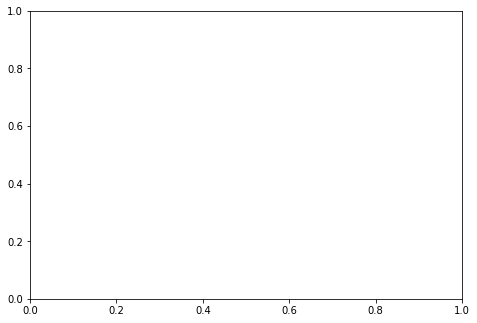

In [157]:
pos = nx.layout.spring_layout(G)
node_colors = [G.nodes[n]['type'] for n in G.nodes]
nx.draw(G, node_color=node_colors, with_labels=True, pos = pos)

In [161]:
partition = nx.community.greedy_modularity_communities(D)

In [165]:
print(f'Maximum number of communities detected: {len(partition)}')

Maximum number of communities detected: 16


In [167]:
set(types.values())

{'Anti-Semitisim',
 'Bitcoin wallet',
 'Type',
 'document transfer/secret chats',
 'hacking',
 'info',
 'journalism',
 'market',
 'market (illegal)',
 'market (illegal/dark) ',
 'onion list',
 'politics',
 'steam tunnels'}

In [170]:
groups = {
    'Anti-Semitisim' : set(),
    'Bitcoin wallet' : set(),
    'document transfer/secret chats' : set(),
    'hacking' : set(),
    'info' : set(),
    'journalism' : set(),
    'market': set(),
    'market (illegal)': set(),
    'market (illegal/dark) ': set(),
    'onion list': set(),
    'politics': set(),
    'steam tunnels': set(),
}

for n in G.nodes:
    #typo
    # club = K.node[n]['club']
    t = G.nodes[n]['type']
    groups[t].add(n)
    
groups

{'Anti-Semitisim': {'http://5dgdi66vr6ab42dvhbbafn5tqe7fah3x2mbofy7jukwdscnusl57y4ad.onion/',
  'http://c26i3k3ti76lh4kqkbb7uqmaakvejbxqb6o6fvsitswf3m2lfjrcndid.onion/',
  'http://gabufscyjyqr5kj3.onion/',
  'http://germanyhusicaysx.onion/',
  'http://hjadhquqiy4c64apcyex3vkbfxm44shpkdc7e443c2b5mses5rdiggqd.onion/',
  'http://konkretzdxpqygow.onion/'},
 'Bitcoin wallet': {'http://easycoinsayj7p5l.onion/',
  'http://ow24et3tetp6tvmk.onion/',
  'http://ts4cwattzgsiitv7.onion/'},
 'document transfer/secret chats': {'http://2qlvvvnhqyda2ahd.onion/',
  'http://3xeiol2bnhrsqhcsaifwtnlqkylrerdspzua7bcjrh26qlrrrctfobid.onion/',
  'http://5gdvpfoh6kb2iqbizb37lzk2ddzrwa47m6rpdueg2m656fovmbhoptqd.onion/',
  'http://5j7saze5byfqccf3.onion/',
  'http://5jp7xtmox6jyoqd5.onion/',
  'http://6sgjmi53igmg7fm7.onion/',
  'http://danschat356lctri3zavzh6fbxg2a7lo6z3etgkctzzpspewu7zdsaqd.onion/',
  'http://jirk5u4osbsr34t5.onion/',
  'http://kfahv6wfkbezjyg4r6mlhpmieydbebr5vkok5r34ya464gqz6c44bnyd.onion/',


In [171]:
empirical_partition = list(groups.values())
empirical_partition

[{'http://5dgdi66vr6ab42dvhbbafn5tqe7fah3x2mbofy7jukwdscnusl57y4ad.onion/',
  'http://c26i3k3ti76lh4kqkbb7uqmaakvejbxqb6o6fvsitswf3m2lfjrcndid.onion/',
  'http://gabufscyjyqr5kj3.onion/',
  'http://germanyhusicaysx.onion/',
  'http://hjadhquqiy4c64apcyex3vkbfxm44shpkdc7e443c2b5mses5rdiggqd.onion/',
  'http://konkretzdxpqygow.onion/'},
 {'http://easycoinsayj7p5l.onion/',
  'http://ow24et3tetp6tvmk.onion/',
  'http://ts4cwattzgsiitv7.onion/'},
 {'http://2qlvvvnhqyda2ahd.onion/',
  'http://3xeiol2bnhrsqhcsaifwtnlqkylrerdspzua7bcjrh26qlrrrctfobid.onion/',
  'http://5gdvpfoh6kb2iqbizb37lzk2ddzrwa47m6rpdueg2m656fovmbhoptqd.onion/',
  'http://5j7saze5byfqccf3.onion/',
  'http://5jp7xtmox6jyoqd5.onion/',
  'http://6sgjmi53igmg7fm7.onion/',
  'http://danschat356lctri3zavzh6fbxg2a7lo6z3etgkctzzpspewu7zdsaqd.onion/',
  'http://jirk5u4osbsr34t5.onion/',
  'http://kfahv6wfkbezjyg4r6mlhpmieydbebr5vkok5r34ya464gqz6c44bnyd.onion/',
  'http://ulrn6sryqaifefld.onion/'},
 {'http://2ogmrlfzdthnwkez.onion/

In [173]:
nx.community.is_partition(G, empirical_partition)

True

In [175]:
nx.community.quality.modularity(G, empirical_partition)

0.03353739685919618

In [177]:
import community as community_louvain
partition_map = community_louvain.best_partition(D)
partition= {}
for node, p in partition_map.items():
    if p not in partition:
        partition[p] = [node]
    else:
        partition[p].append(node)

In [179]:
partition = list(partition.values())

In [181]:
nx.community.quality.modularity(G, partition)

0.4571568968694334

In [182]:
nx.attribute_assortativity_coefficient(G, 'type')

0.03456790123456789

In [183]:
nx.degree_assortativity_coefficient(G)

-0.43755291840253724